In [1]:
# To read and manipulate the data
import pandas as pd
pd.set_option('max_colwidth', None)
# Help to extract the data using regular exprression
import re
#help to remove punctuation
import string
#importing the NLTK Library
import nltk
# Download the Open Multilingual WordNet data, which provides multilingual WordNet data.
nltk.download("omw-1.4")
from nltk.corpus import stopwords
#helps to visualize the wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
#used in stemming
from nltk.stem.porter import PorterStemmer
#used in lemmatization
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer #for TF-IDf
# to create train , test data
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
pd.set_option('max_colwidth',None)
import seaborn as sns

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
data = pd.read_csv("spam.csv")

In [3]:
df= data.copy()

In [4]:
df.head()

,class,text
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives around here though"


In [5]:
df.shape

(5572, 2)

In [6]:
#checking for null values
df.isna().sum()

class    0
text     0
dtype: int64

In [7]:
#info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   5572 non-null   int64 
 1   text    5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [8]:
df.info

<bound method DataFrame.info of       class  \
0         0   
1         0   
2         1   
3         0   
4         0   
...     ...   
5567      1   
5568      0   
5569      0   
5570      0   
5571      0   

                                                                                                                                                                   text  
0                                                       Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...  
1                                                                                                                                         Ok lar... Joking wif u oni...  
2           Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's  
3                                                                                                          

In [9]:
df['class'].value_counts()

class
0    4825
1     747
Name: count, dtype: int64

<Axes: xlabel='class', ylabel='count'>

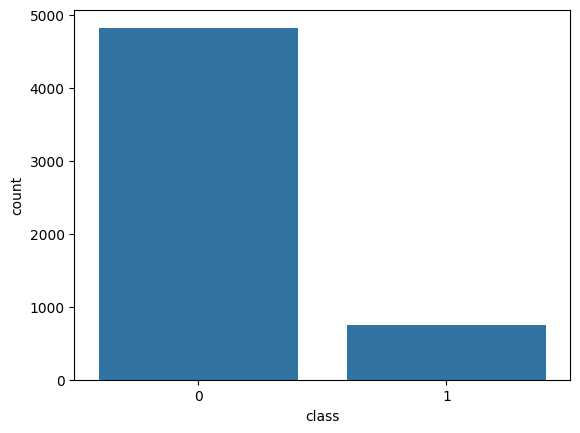

In [10]:
import seaborn as sns
sns.countplot(x='class',data = df)

In [11]:
# Define preprocessing functions
def remove_special_chars(text):
    return re.sub('[^a-zA-Z]', ' ', text)

In [12]:
def remove_contractions(text):
    expanded_text = [contractions.fix(word) for word in text.split()]
    return ' '.join(expanded_text)

In [13]:
def to_lowercase(words):
    return [word.lower() for word in words]

In [14]:
def remove_stopwords(words):
    stop_words = set(stopwords.words('english'))
    return [word for word in words if word not in stop_words]

In [15]:
def lemmatize_words(words):
    lm = WordNetLemmatizer()
    return [lm.lemmatize(word) for word in words]

In [16]:
def preprocess_text(text):
    text = remove_special_chars(text)
    text = remove_contractions(text)
    words = word_tokenize(text)
    words = to_lowercase(words)
    words = remove_stopwords(words)
    words = lemmatize_words(words)
    return ' '.join(words)

In [18]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import joblib
import contractions

In [19]:
# Apply preprocessing to the text column
df = data.copy()
df["text"] = df["text"].apply(lambda x: preprocess_text(x))

In [20]:
print(df.head(2))

   class  \
0      0   
1      0   

                                                                                 text  
0  go jurong point crazy available bugis n great world la e buffet cine got amore wat  
1                                                               ok lar joking wif oni  


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df["text"]).toarray()
y = df["class"]

In [22]:
# Save the vectorizer
import joblib
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

In [23]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train Logistic Regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [25]:
# Save the Logistic Regression model
joblib.dump(lr_model, 'logistic_regression_model.pkl')

['logistic_regression_model.pkl']

In [26]:
# Predictions and evaluation
y_pred_lr = lr_model.predict(X_test)

In [27]:
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Logistic Regression Accuracy Score:", accuracy_score(y_test, y_pred_lr))

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       965
           1       0.95      0.67      0.79       150

    accuracy                           0.95      1115
   macro avg       0.95      0.83      0.88      1115
weighted avg       0.95      0.95      0.95      1115

Logistic Regression Confusion Matrix:
 [[960   5]
 [ 49 101]]
Logistic Regression Accuracy Score: 0.9515695067264573


In [28]:
from sklearn.naive_bayes import MultinomialNB

# Train Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [29]:
# Save the Naive Bayes model
joblib.dump(nb_model, 'naive_bayes_model.pkl')

['naive_bayes_model.pkl']

In [30]:
# Predictions and evaluation
y_pred_nb = nb_model.predict(X_test)
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))
print("Naive Bayes Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("Naive Bayes Accuracy Score:", accuracy_score(y_test, y_pred_nb))

Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.76      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115

Naive Bayes Confusion Matrix:
 [[965   0]
 [ 36 114]]
Naive Bayes Accuracy Score: 0.967713004484305


In [31]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [32]:
# Save the Random Forest model
joblib.dump(rf_model, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [33]:
# Predictions and evaluation
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Random Forest Accuracy Score:", accuracy_score(y_test, y_pred_rf))

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       0.99      0.83      0.91       150

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115

Random Forest Confusion Matrix:
 [[964   1]
 [ 25 125]]
Random Forest Accuracy Score: 0.9766816143497757


In [34]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, SpatialDropout1D

In [35]:
# Tokenization and padding for LSTM
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df["text"])

In [36]:
X_seq = tokenizer.texts_to_sequences(df["text"])
max_seq_len = 100
X_pad = pad_sequences(X_seq, maxlen=max_seq_len)
X_train_pad, X_test_pad, y_train_pad, y_test_pad = train_test_split(X_pad, y, test_size=0.2, random_state=42)

In [37]:
# LSTM model
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=5000, output_dim=128, input_length=max_seq_len))
lstm_model.add(SpatialDropout1D(0.2))
lstm_model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
lstm_model.add(Dense(1, activation='sigmoid'))
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [38]:
# Train LSTM model
lstm_model.fit(X_train_pad, y_train_pad, epochs=10, batch_size=32, validation_data=(X_test_pad, y_test_pad), verbose=2)

Epoch 1/10


140/140 - 43s - loss: 0.1644 - accuracy: 0.9475 - val_loss: 0.0547 - val_accuracy: 0.9848 - 43s/epoch - 304ms/step
Epoch 2/10
140/140 - 29s - loss: 0.0316 - accuracy: 0.9906 - val_loss: 0.0494 - val_accuracy: 0.9874 - 29s/epoch - 210ms/step
Epoch 3/10
140/140 - 28s - loss: 0.0117 - accuracy: 0.9973 - val_loss: 0.0506 - val_accuracy: 0.9830 - 28s/epoch - 197ms/step
Epoch 4/10
140/140 - 28s - loss: 0.0066 - accuracy: 0.9980 - val_loss: 0.0565 - val_accuracy: 0.9830 - 28s/epoch - 201ms/step
Epoch 5/10
140/140 - 28s - loss: 0.0045 - accuracy: 0.9984 - val_loss: 0.0714 - val_accuracy: 0.9839 - 28s/epoch - 199ms/step
Epoch 6/10
140/140 - 30s - loss: 0.0028 - accuracy: 0.9993 - val_loss: 0.0679 - val_accuracy: 0.9848 - 30s/epoch - 212ms/step
Epoch 7/10
140/140 - 30s - loss: 0.0039 - accuracy: 0.9991 - val_loss: 0.0757 - val_accuracy: 0.9830 - 30s/epoch - 216ms/step
Epoch 8/10
140/140 - 29s - loss: 8.5637e-04 - accuracy: 1.0000 - val_loss: 0.0817 - val_accuracy: 0.9848 - 29s/epoch

In [39]:
# Save the LSTM model
lstm_model.save('lstm_model.h5')

C:\Users\USER\anaconda3\envs\nlp\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [40]:
# Save the tokenizer
joblib.dump(tokenizer, 'tokenizer.pkl')

['tokenizer.pkl']

In [41]:
# Predictions and evaluation
y_pred_lstm = (lstm_model.predict(X_test_pad) > 0.5).astype("int32")

35/35 [==============================] - 2s 40ms/step


In [42]:
print("LSTM Classification Report:\n", classification_report(y_test_pad, y_pred_lstm))
print("LSTM Confusion Matrix:\n", confusion_matrix(y_test_pad, y_pred_lstm))
print("LSTM Accuracy Score:", accuracy_score(y_test_pad, y_pred_lstm))

LSTM Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.96      0.92      0.94       150

    accuracy                           0.98      1115
   macro avg       0.97      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115

LSTM Confusion Matrix:
 [[959   6]
 [ 12 138]]
LSTM Accuracy Score: 0.9838565022421525
